In [2]:
import json 
import requests 
import pandas as pd 
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re
import configparser
from Graph import Graph
from textblob import TextBlob
from wordcloud import WordCloud

In [3]:
# Load settings
config = configparser.ConfigParser()
config.read('config.cfg')
azure_settings = config['azure']

graph: Graph = Graph(azure_settings)

## Function to my Mailbox

In [4]:
def get_inbox(self):
    endpoint = '/me/mailFolders/inbox/messages'
    # Only request specific properties
    select = 'from,isRead,receivedDateTime,subject,bodyPreview'
    # Get at most 25 results
    top = 25
    # Sort by received time, newest first
    order_by = 'receivedDateTime DESC'
    request_url = f'{endpoint}?$select={select}&$top={top}&$orderBy={order_by}'

    inbox_response = self.user_client.get(request_url)
    return inbox_response.json()

### Prepare for Pandas Datframe

In [8]:
maildump = get_inbox(graph)

In [9]:
#maildump

In [10]:
justmymailbox = maildump['value']

In [12]:
#justmymailbox

In [13]:
df = pd.read_json(json.dumps(justmymailbox))
df.set_index(['id'],inplace=True)

In [14]:
df

,@odata.etag,receivedDateTime,subject,bodyPreview,isRead,from
id,,,,,,
AQMkADQyZjdhNGVlAC0wYmVkLTQyZDEtOWYxNC0yNmFjNDgyYTc5MDcARgAAA2tiD8sGxqdHvqoPG8TcdvAHAB8ZbriRHpRPqGVbfyQMOhMAAAIBDAAAAB8ZbriRHpRPqGVbfyQMOhMAAAJxQgAAAA==,"W/""CQAAABYAAAAfGW64kR6UT6hlW38kDDoTAAAAACfz""",2022-11-29T11:09:35Z,Jada & Fabian says Hi from ESPC22,Hello Attendees in our Denmark Session!,False,"{'emailAddress': {'name': 'Gabby Gabgab', 'add..."
AQMkADQyZjdhNGVlAC0wYmVkLTQyZDEtOWYxNC0yNmFjNDgyYTc5MDcARgAAA2tiD8sGxqdHvqoPG8TcdvAHAB8ZbriRHpRPqGVbfyQMOhMAAAIBDAAAAB8ZbriRHpRPqGVbfyQMOhMAAAJxQQAAAA==,"W/""CQAAABYAAAAfGW64kR6UT6hlW38kDDoTAAAAACfC""",2022-11-29T11:03:45Z,happy mail,here's a HAPPY MAIL :),True,"{'emailAddress': {'name': 'Mandy Durstewitz', ..."
AQMkADQyZjdhNGVlAC0wYmVkLTQyZDEtOWYxNC0yNmFjNDgyYTc5MDcARgAAA2tiD8sGxqdHvqoPG8TcdvAHAB8ZbriRHpRPqGVbfyQMOhMAAAIBDAAAAB8ZbriRHpRPqGVbfyQMOhMAAAJxQAAAAA==,"W/""CQAAABYAAAAfGW64kR6UT6hlW38kDDoTAAAAACe5""",2022-11-29T11:03:36Z,Happy or unhappy,"Hi,\r\n\r\nI‘m not yet sure if I am happy abou...",False,{'emailAddress': {'name': 'torsten.link@bcc.de...
AQMkADQyZjdhNGVlAC0wYmVkLTQyZDEtOWYxNC0yNmFjNDgyYTc5MDcARgAAA2tiD8sGxqdHvqoPG8TcdvAHAB8ZbriRHpRPqGVbfyQMOhMAAAIBDAAAAB8ZbriRHpRPqGVbfyQMOhMAAAJxPwAAAA==,"W/""CQAAABYAAAAfGW64kR6UT6hlW38kDDoTAAAAACev""",2022-11-29T11:03:26Z,Tech Learning,Hi\r\n\r\nThis day will be a good day to learn...,True,"{'emailAddress': {'name': 'Martin venø', 'addr..."
AQMkADQyZjdhNGVlAC0wYmVkLTQyZDEtOWYxNC0yNmFjNDgyYTc5MDcARgAAA2tiD8sGxqdHvqoPG8TcdvAHAB8ZbriRHpRPqGVbfyQMOhMAAAIBDAAAAB8ZbriRHpRPqGVbfyQMOhMAAAJxPgAAAA==,"W/""CQAAABYAAAAfGW64kR6UT6hlW38kDDoTAAAAACfM""",2022-11-29T11:02:20Z,What? Anaconda,"Hi Gabby,\r\n\r\nWhy on earth you using Anacon...",False,"{'emailAddress': {'name': 'Paul Bullock', 'add..."
AQMkADQyZjdhNGVlAC0wYmVkLTQyZDEtOWYxNC0yNmFjNDgyYTc5MDcARgAAA2tiD8sGxqdHvqoPG8TcdvAHAB8ZbriRHpRPqGVbfyQMOhMAAAIBDAAAAB8ZbriRHpRPqGVbfyQMOhMAAAJxPQAAAA==,"W/""CQAAABYAAAAfGW64kR6UT6hlW38kDDoTAAAAACef""",2022-11-29T11:01:51Z,Hangry,I am so happy that you can see how angry I am....,False,"{'emailAddress': {'name': 'Ole Seglem', 'addre..."
AQMkADQyZjdhNGVlAC0wYmVkLTQyZDEtOWYxNC0yNmFjNDgyYTc5MDcARgAAA2tiD8sGxqdHvqoPG8TcdvAHAB8ZbriRHpRPqGVbfyQMOhMAAAIBDAAAAB8ZbriRHpRPqGVbfyQMOhMAAAJxPAAAAA==,"W/""CQAAABYAAAAfGW64kR6UT6hlW38kDDoTAAAAACeb""",2022-11-29T11:01:45Z,Happy about the presentation,"But really eager to get to lunch!\r\nBest, Rob...",False,"{'emailAddress': {'name': 'Robert Sjursen', 'a..."
AQMkADQyZjdhNGVlAC0wYmVkLTQyZDEtOWYxNC0yNmFjNDgyYTc5MDcARgAAA2tiD8sGxqdHvqoPG8TcdvAHAB8ZbriRHpRPqGVbfyQMOhMAAAIBDAAAAB8ZbriRHpRPqGVbfyQMOhMAAAJxOwAAAA==,"W/""CQAAABYAAAAfGW64kR6UT6hlW38kDDoTAAAAACfJ""",2022-11-29T11:01:01Z,Thank you,"Hi Gabby,\r\n\r\nThank you for delivering an a...",False,"{'emailAddress': {'name': 'Paul Bullock', 'add..."
AQMkADQyZjdhNGVlAC0wYmVkLTQyZDEtOWYxNC0yNmFjNDgyYTc5MDcARgAAA2tiD8sGxqdHvqoPG8TcdvAHAB8ZbriRHpRPqGVbfyQMOhMAAAIBDAAAAB8ZbriRHpRPqGVbfyQMOhMAAAJxOgAAAA==,"W/""CQAAABYAAAAfGW64kR6UT6hlW38kDDoTAAAAACXm""",2022-11-29T09:37:18Z,Jada & Fabian says Hi from ESPC22,Hello Attendees in our Denmark Session!,True,"{'emailAddress': {'name': 'Fabian Williams', '..."


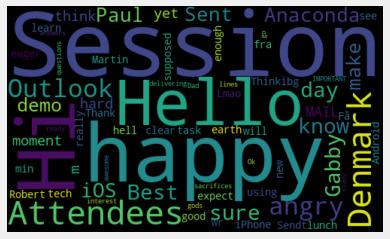

In [15]:
allWords = ' '.join(filter(lambda x: x if x is not None else '',[bodyp for bodyp in df['bodyPreview']]))
wordCloud = WordCloud(width = 500, height=300, random_state = 25, max_font_size = 120).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

<AxesSubplot:title={'center':'Emails Read Unread'}, xlabel='Inbox Status', ylabel='Count'>

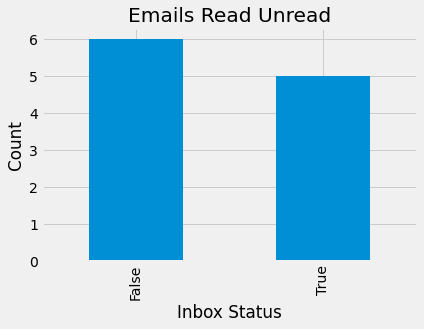

In [16]:
df['isRead'].value_counts()

#plot and visualize
plt.title('Emails Read Unread')
plt.xlabel('Inbox Status')
plt.ylabel('Count')
df['isRead'].value_counts().plot(kind='bar')